In [178]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [179]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [180]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

## 1. EDA

In [181]:
data = pd.read_csv('diabetes.csv')

### Checking data head and info

In [182]:
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### This dataset has 8 features and a target variable which is 'Outcome'

In [183]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

### Evaluating Target's distribution
Here “Outcome” is the target class and contains values zeros or ones. So it have 500(64.1%) zero value and 268(34.9%) one value. Since one class is significantly lower than the other class.

#### Remarks: This dataset suffers from class imbalance problem. 

In [184]:
data.groupby("Outcome").size()

Outcome
0    500
1    268
dtype: int64

In [185]:
D = data[(data['Outcome'] != 0)]
H = data[(data['Outcome'] == 0)]

#COUNT
def target_count():
    trace = go.Bar( x = data['Outcome'].value_counts().values.tolist(), 
                    y = ['healthy','diabetic' ], 
                    orientation = 'h', 
                    text=data['Outcome'].value_counts().values.tolist(), 
                    textfont=dict(size=15),
                    textposition = 'auto',
                    opacity = 0.8,marker=dict(
                    color=['lightskyblue', 'gold'],
                    line=dict(color='#000000',width=1.5)))

    layout = dict(title =  'Count of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)


In [186]:
target_count()

In [187]:
#PERCENTAGE
def target_percent():
    trace = go.Pie(labels = ['healthy','diabetic'], values = data['Outcome'].value_counts(), 
                   textfont=dict(size=15), opacity = 0.8,
                   marker=dict(colors=['lightskyblue', 'gold'], 
                               line=dict(color='#000000', width=1.5)))


    layout = dict(title =  'Distribution of Outcome variable')

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

In [188]:
target_percent()

### Handle Missing Values
##### If we look at data.head() we can see some features contain '0' values. Often, in many datasets, it may appear that there exists no missing entries. However, when you look at the dataset closely, it is often found that the missing entries are replaced by a zero (0) and it doesn't make any sense here. 

#### Replace Missing Data

In [189]:
#all missing values are encoded with NaN value
data[['Glucose',
      'BloodPressure',
      'SkinThickness',
      'Insulin',
      'BMI']] = data[['Glucose',
                      'BloodPressure',
                      'SkinThickness',
                      'Insulin',
                      'BMI']].replace(0,np.NaN)

#### Now we look at missing values

In [190]:
# Define missing plot to detect all missing values in dataset
def missing_plot(dataset, key) :
    null_feat = pd.DataFrame(len(dataset[key]) - dataset.isnull().sum(), columns = ['Count'])
    percentage_null = pd.DataFrame((len(dataset[key]) - (len(dataset[key]) - dataset.isnull().sum()))/len(dataset[key])*100, columns = ['Count'])
    percentage_null = percentage_null.round(2)

    trace = go.Bar(x = null_feat.index, y = null_feat['Count'], 
                   opacity = 0.8, text = percentage_null['Count'],  
                   textposition = 'auto',
                   marker=dict(color = '#7EC0EE',line=dict(color='#000000',width=1.5)))

    layout = dict(title =  "Missing Values (count & %)")

    fig = dict(data = [trace], layout=layout)
    py.iplot(fig)

# Plotting 
missing_plot(data, 'Outcome')

#### Missing values :

* Item Insulin = 48.7% - 374
* Item SkinThickness = 29.56% - 227
* Item BloodPressure = 4.56% - 35
* Item BMI = 1.43% - 11
* Item Glucose = 0.65% - 5

### Overview of dataset
##### Now all null value is replaced with Nan value

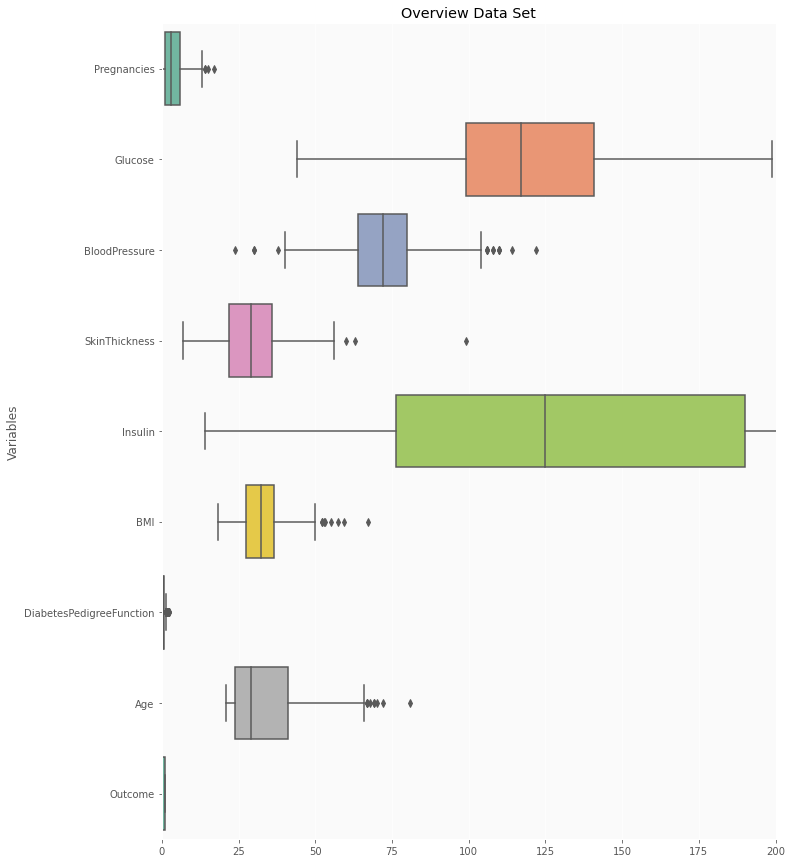

In [191]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

#### To replace these NaN (Null) values we  need to understand data distribution against the 'Target' 
#### Here we plot a corelation map
A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows us to see which pairs have the highest correlation.

In [192]:
def correlation_plot():
    #correlation
    correlation = data.corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale='Viridis',
                       colorbar   = dict() ,
                      )
    layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                            #autosize = False,
                            #height  = 1400,
                            #width   = 1600,
                            margin  = dict(r = 0 ,l = 100,
                                           t = 0,b = 100,
                                         ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9)),
                           )
                      )
    fig = go.Figure(data = [trace],layout = layout)
    py.iplot(fig)
    
correlation_plot()

#### Now we need to replace missing values. We replaced missing values with median by target(Outcome), now we observe an overview of our dataset with boxplot.

In [193]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

##### Plot distribution of fetures:

In [194]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = D[data_select]
    tmp2 = H[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')

### 1.1 Insulin

In [195]:
plot_distribution('Insulin', 0)

In [196]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [197]:
data.loc[(data['Outcome'] == 0 ) & (data['Insulin'].isnull()), 'Insulin'] = 102.5
data.loc[(data['Outcome'] == 1 ) & (data['Insulin'].isnull()), 'Insulin'] = 169.5

#### Remarks: Insulin's medians by the target are really different ! 102.5 for a healthy person and 169.5 for a diabetic person

### 1.2 Glucose

In [198]:
plot_distribution('Glucose', 0)

In [199]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [200]:
data.loc[(data['Outcome'] == 0 ) & (data['Glucose'].isnull()), 'Glucose'] = 107
data.loc[(data['Outcome'] == 1 ) & (data['Glucose'].isnull()), 'Glucose'] = 140

#### Remarks: 107 for a healthy person and 140 for a diabetic person

### 1.3 Skin Thickness: Triceps skin fold thickness (mm)

In [201]:
plot_distribution('SkinThickness', 10)

In [202]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [203]:
data.loc[(data['Outcome'] == 0 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27
data.loc[(data['Outcome'] == 1 ) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32

#### Remarks: 27 for a healthy person and 32 for a diabetic person

### 1.4 Blood Pressure

In [204]:
plot_distribution('BloodPressure', 5)

In [205]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [206]:
data.loc[(data['Outcome'] == 0 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70
data.loc[(data['Outcome'] == 1 ) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

#### Remarks: No sifnificance in Blood Pressure

### 1.5 BMI: Body mass index (weight in kg/(height in m)^2)

In [207]:
plot_distribution('BMI', 0)

In [208]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [209]:
data.loc[(data['Outcome'] == 0 ) & (data['BMI'].isnull()), 'BMI'] = 30.1
data.loc[(data['Outcome'] == 1 ) & (data['BMI'].isnull()), 'BMI'] = 34.3

#### Remarks: No significance in BMI too. 

### 1.6 Age

In [210]:
plot_distribution('Age', 0)

In [211]:
median_target('Age')

,Outcome,Age
0,0,27
1,1,36


#### Remarks: No significance in Age too. 

### 1.7  Pregnancies: Number of times pregnant

In [212]:
plot_distribution('Pregnancies', 0)

In [213]:
median_target('Pregnancies')

,Outcome,Pregnancies
0,0,2
1,1,4


#### Remarks: No significance in Pregnancies too. 

### 1.8 Diabetes Pedigree Function

In [214]:
plot_distribution('DiabetesPedigreeFunction', 0)

In [215]:
median_target('DiabetesPedigreeFunction')

,Outcome,DiabetesPedigreeFunction
0,0,0.336
1,1,0.449


#### Remarks: No significance in Diabetes Pedigree Function too. 

In [216]:
#Now We Check Missing values

missing_plot(data, 'Outcome')

#### Now we dont have any missing values( All values are replaced)

### EDA 2: Now we define a plot function to visualze more feature

In [217]:
def plot_feat1_feat2(feat1, feat2) :  
    D = data[(data['Outcome'] != 0)]
    H = data[(data['Outcome'] == 0)]
    trace0 = go.Scatter(
        x = D[feat1],
        y = D[feat2],
        name = 'diabetic',
        mode = 'markers', 
        marker = dict(color = '#FFD700',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = H[feat1],
        y = H[feat2],
        name = 'healthy',
        mode = 'markers',
        marker = dict(color = '#7EC0EE',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

### 2.1 Glucose and Age

In [218]:
plot_feat1_feat2('Glucose','Age')

#### Remarks: Healthy persons are concentrate with an age <= 30 and glucose <= 120

### 2.2 Glucose and Blood Pressure

In [219]:
plot_feat1_feat2('Glucose','BloodPressure')

#### Remarks: Healthy persons are concentrate with an blood pressure <= 80 and glucose <= 105

### Skin Thickness and BMI

In [220]:
plot_feat1_feat2('SkinThickness','BMI')

#### Remarks: Healthy persons are concentrate with a BMI < 30 and skin thickness <= 20

## Machine Learing Processes

In [221]:
diabetes_data = data

In [222]:
X = diabetes_data.drop("Outcome",axis = 1)
y = diabetes_data.Outcome

In [223]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [224]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

# Decision Tree

In [225]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.840


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [226]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.844


In [227]:
y_pred = dt.predict(X_test)


In [228]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[147  20]
 [ 20  69]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       167
           1       0.78      0.78      0.78        89

    accuracy                           0.84       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.84      0.84      0.84       256



In [229]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

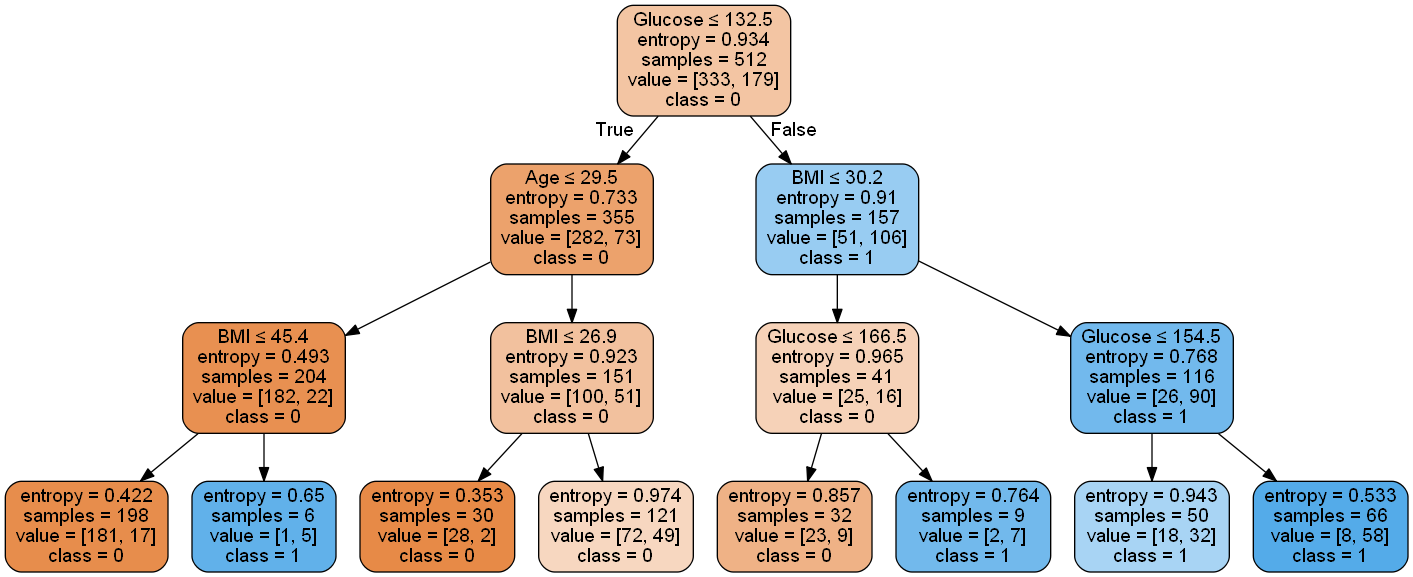

In [230]:
#DT visualizatin method 2
# need to install Graphviz first https://graphviz.gitlab.io/_pages/Download/Download_windows.html
from sklearn.tree import export_graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


In [231]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [233]:
!conda install -y pydotplus

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Saminux\anaconda3

  added / updated specs:
    - pydotplus





The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2020.11=py38_0
  - defaults/win-64::anaconda-client==1.7.2=py38_0
  - defaults/win-64::anaconda-navigator==2.0.3=py38_0
  - defaults/noarch::anaconda-project==0.8.4=py_0
  - defaults/win-64::conda==4.10.1=py38haa95532_1
  - defaults/win-64::conda-build==3.20.5=py38_1
  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
  - defaults/noarch::conda-token==0.3.0=pyhd3eb1b0_0
  - defaults/noarch::jupyterlab==2.2.6=py_0
  - defaults/noarch::jupyterlab_server==1.2.0=py_0

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pydotplus-2.0.2            |             py_3          23 KB
    ------------------------------------------------------------
                                           Total:        29.3 MB

The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/win-64::_anaconda_depends-2020.07-py38_0
  charset-normalizer pkgs/main/noarch::charset-normalizer-2.0.4-pyhd3eb1b0_0
  gmpy2              pkgs/main/win-64::gmpy2-2.0.8-py38h7edee0f_3
  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  libllvm9           pkgs/main/win-64::libllvm9-9.0.1-h21ff451_0
  mpc                pkgs/main/win-64::mpc-1.1.0-h7edee0f_1
  mpfr               pkgs/main/win-64::mpfr-4.0.2-h62dcd97_1
  mpir               pkgs/main/win-64::mpir-3.0.0-hec2e145_1
  pydotplus          p


  - defaults/noarch::numpydoc==1.1.0=pyhd3eb1b0_1
  - defaults/noarch::sphinx==3.2.1=py_0
  - defaults/win-64::spyder==4.1.5=py38_0
  - defaults/win-64::_ipyw_jlab_nb_ext_conf==0.1.0=py38_0


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\Saminux\anaconda3\pkgs\pytorch-1.8.1-py3.8_cpu_0.tar.bz2.  Please remove this file manually (you may need to reboot to free file handles)
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(143): Could not remove or rename C:\Users\Saminux\anaconda3\pkgs\pytorch-1.8.1-py3.8_cpu_0\Lib\site-packages\torch\lib\mkldnn.lib.  Please remove this file manually (you may need to reboot to free file handles)

RemoveError: 'requests' is a dependency of conda and cannot be removed from
conda's operating environment.



graphviz-2.38        | 29.3 MB   | 7          |   7% 
graphviz-2.38        | 29.3 MB   | 8          |   8% 
graphviz-2.38        | 29.3 MB   | 9          |   9% 
graphviz-2.38        | 29.3 MB   | #          |  11% 
graphviz-2.38        | 29.3 MB   | #1         |  12% 
graphviz-2.38        | 29.3 MB   | #2         |  13% 
graphviz-2.38        | 29.3 MB   | #3         |  14% 
graphviz-2.38        | 29.3 MB   | #4         |  15% 
graphviz-2.38        | 29.3 MB   | #5         |  16% 
graphviz-2.38        | 29.3 MB   | #6         |  17% 
graphviz-2.38        | 29.3 MB   | #7         |  18% 
graphviz-2.38        | 29.3 MB   | #8         |  19% 
graphviz-2.38        | 29.3 MB   | #9         |  20% 
graphviz-2.38        | 29.3 MB   | ##         |  21% 
graphviz-2.38        | 29.3 MB   | ##2        |  22% 
graphviz-2.38        | 29.3 MB   | ##2        |  23% 
graphviz-2.38        | 29.3 MB   | ##3        |  24% 
graphviz-2.38        | 29.3 MB   | ##4        |  25% 
graphviz-2.38        | 29.3 

In [ ]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Plot ROC chart for DT.Write your code below.

In [238]:
from sklearn.metrics import roc_curve, auc

In [235]:
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

In [236]:
y_scores = dt.predict_proba(X_train)
y_scores = y_scores[:,1]

In [239]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

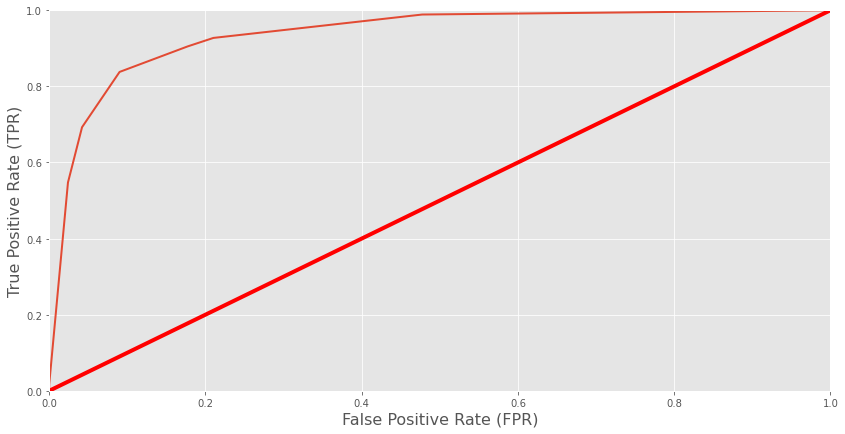

In [240]:
plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

## Adjust the decision tree parameters to improve the performance.Write your code below.



Text(0, 0.5, 'Testing Accuracy')

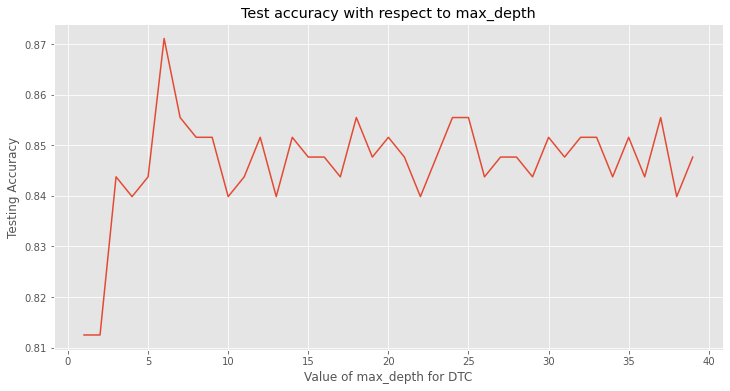

In [248]:
test_acc_dtc = []

#testing different max_depth value
for i in range(1, 40):
    clf_test  = DecisionTreeClassifier(criterion="gini", max_depth=i)
    clf_test = clf_test.fit(X_train,y_train)
    y_pred = clf_test.predict(X_test)
    test_acc_dtc.append(metrics.accuracy_score(y_test, y_pred))
    
#plot graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), test_acc_dtc)
plt.title('Test accuracy with respect to max_depth')
plt.xlabel('Value of max_depth for DTC')
plt.ylabel('Testing Accuracy')

In [249]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.84765625


And we can see that for max_depth = 6 we get highest accuracy, which is 84.765625%

## find out the feature importance from the decision tree built above. Write your code below.


In [241]:
!pip install shap

In [243]:
import shap

In [244]:
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)

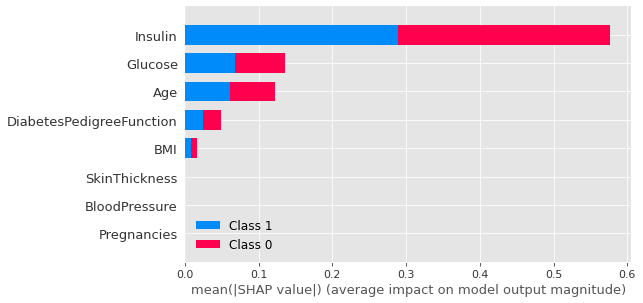

In [246]:
shap.summary_plot(shap_values, X_test)

# NN

In [250]:

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [251]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.73693523
Iteration 2, loss = 0.72800200
Iteration 3, loss = 0.71977031
Iteration 4, loss = 0.71189124
Iteration 5, loss = 0.70387663
Iteration 6, loss = 0.69649035
Iteration 7, loss = 0.68888280
Iteration 8, loss = 0.68200724
Iteration 9, loss = 0.67505053
Iteration 10, loss = 0.66796969
Iteration 11, loss = 0.66132281
Iteration 12, loss = 0.65468971
Iteration 13, loss = 0.64807627
Iteration 14, loss = 0.64187001
Iteration 15, loss = 0.63516160
Iteration 16, loss = 0.62908033
Iteration 17, loss = 0.62297159
Iteration 18, loss = 0.61673595
Iteration 19, loss = 0.61058944
Iteration 20, loss = 0.60455981
Iteration 21, loss = 0.59870481
Iteration 22, loss = 0.59274083
Iteration 23, loss = 0.58668997
Iteration 24, loss = 0.58085610
Iteration 25, loss = 0.57498341
Iteration 26, loss = 0.56946204
Iteration 27, loss = 0.56377186
Iteration 28, loss = 0.55804966
Iteration 29, loss = 0.55281268
Iteration 30, loss = 0.54722755
Iteration 31, loss = 0.54201731
Iteration 32, los

Iteration 308, loss = 0.28795773
Iteration 309, loss = 0.28766344
Iteration 310, loss = 0.28754987
Iteration 311, loss = 0.28730945
Iteration 312, loss = 0.28702238
Iteration 313, loss = 0.28675932
Iteration 314, loss = 0.28662474
Iteration 315, loss = 0.28629229
Iteration 316, loss = 0.28614675
Iteration 317, loss = 0.28588130
Iteration 318, loss = 0.28563441
Iteration 319, loss = 0.28546333
Iteration 320, loss = 0.28520094
Iteration 321, loss = 0.28505509
Iteration 322, loss = 0.28475314
Iteration 323, loss = 0.28452325
Iteration 324, loss = 0.28431301
Iteration 325, loss = 0.28412429
Iteration 326, loss = 0.28378693
Iteration 327, loss = 0.28358297
Iteration 328, loss = 0.28334386
Iteration 329, loss = 0.28308549
Iteration 330, loss = 0.28286647
Iteration 331, loss = 0.28263875
Iteration 332, loss = 0.28245663
Iteration 333, loss = 0.28237966
Iteration 334, loss = 0.28205147
Iteration 335, loss = 0.28181326
Iteration 336, loss = 0.28175607
Iteration 337, loss = 0.28135409
Iteration 

Iteration 615, loss = 0.22370019
Iteration 616, loss = 0.22343008
Iteration 617, loss = 0.22329838
Iteration 618, loss = 0.22306860
Iteration 619, loss = 0.22291176
Iteration 620, loss = 0.22277385
Iteration 621, loss = 0.22260640
Iteration 622, loss = 0.22231224
Iteration 623, loss = 0.22217665
Iteration 624, loss = 0.22208941
Iteration 625, loss = 0.22183333
Iteration 626, loss = 0.22163196
Iteration 627, loss = 0.22163152
Iteration 628, loss = 0.22137565
Iteration 629, loss = 0.22115401
Iteration 630, loss = 0.22099836
Iteration 631, loss = 0.22084552
Iteration 632, loss = 0.22067407
Iteration 633, loss = 0.22052522
Iteration 634, loss = 0.22042835
Iteration 635, loss = 0.22030889
Iteration 636, loss = 0.22002649
Iteration 637, loss = 0.21984255
Iteration 638, loss = 0.21956164
Iteration 639, loss = 0.21946613
Iteration 640, loss = 0.21926632
Iteration 641, loss = 0.21910050
Iteration 642, loss = 0.21885489
Iteration 643, loss = 0.21871334
Iteration 644, loss = 0.21853815
Iteration 

Iteration 922, loss = 0.18368980
Iteration 923, loss = 0.18348831
Iteration 924, loss = 0.18334980
Iteration 925, loss = 0.18327276
Iteration 926, loss = 0.18315782
Iteration 927, loss = 0.18305363
Iteration 928, loss = 0.18299786
Iteration 929, loss = 0.18283226
Iteration 930, loss = 0.18272406
Iteration 931, loss = 0.18250811
Iteration 932, loss = 0.18245147
Iteration 933, loss = 0.18232702
Iteration 934, loss = 0.18213874
Iteration 935, loss = 0.18214057
Iteration 936, loss = 0.18190740
Iteration 937, loss = 0.18184048
Iteration 938, loss = 0.18178231
Iteration 939, loss = 0.18167837
Iteration 940, loss = 0.18152099
Iteration 941, loss = 0.18145282
Iteration 942, loss = 0.18118205
Iteration 943, loss = 0.18117988
Iteration 944, loss = 0.18100616
Iteration 945, loss = 0.18088659
Iteration 946, loss = 0.18064681
Iteration 947, loss = 0.18059299
Iteration 948, loss = 0.18040996
Iteration 949, loss = 0.18039945
Iteration 950, loss = 0.18034372
Iteration 951, loss = 0.18017101
Iteration 

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, verbose=2)

In [252]:
predictions = mlp.predict(X_test)  


print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 0.796875
[[145  22]
 [ 30  59]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       167
           1       0.73      0.66      0.69        89

    accuracy                           0.80       256
   macro avg       0.78      0.77      0.77       256
weighted avg       0.79      0.80      0.79       256



In [253]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.934
Accuracy on test set: 0.797


In [254]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

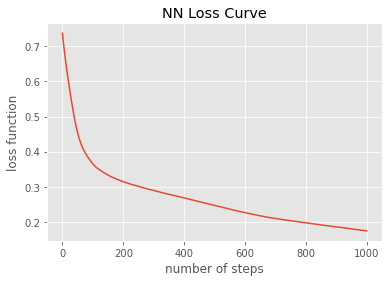

In [255]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [256]:
#check out weights

In [257]:
(mlp.intercepts_[0]).shape

(10,)

In [258]:
(mlp.coefs_[0]).shape

(8, 10)

In [259]:
mlp.intercepts_[0]

array([ 0.51000149,  0.28906812,  0.25652017, -0.12299543,  0.35560242,
       -0.45574157,  0.86582083,  0.55751899,  0.75291059, -0.46973283])

In [260]:
mlp.coefs_[0]

array([[ 1.90483158e-01,  6.09824541e-01, -3.21605210e-02,
         1.67100575e-01,  1.73296780e-02, -2.40851757e-01,
         3.01739915e-02, -2.23890821e-01,  1.61146138e-01,
        -6.33177636e-01],
       [ 3.05748196e-01, -1.14471272e-02,  5.02628284e-01,
         3.42096449e-02, -1.41236413e-01,  2.77208997e-02,
         1.01499475e-01, -6.91171376e-01,  4.62175938e-02,
        -7.29656216e-01],
       [-6.09846349e-01, -3.76486973e-01,  3.98502743e-01,
        -5.84304652e-01,  1.42984439e-01, -1.16564413e+00,
        -9.59719920e-01, -6.00927614e-01, -1.07246314e+00,
         7.49265974e-01],
       [-1.19338624e+00,  8.29738565e-01,  1.27166954e-01,
        -2.74880175e-01,  3.25622622e-01,  4.72904107e-01,
        -3.76182198e-01,  5.98840296e-01,  1.69761017e-01,
         1.13628189e+00],
       [ 2.29344735e-01,  2.28683550e-01, -2.03642595e-01,
        -9.16842904e-01, -1.48208528e+00, -2.33233727e-01,
        -2.91336515e-01, -6.18856856e-02, -2.66826677e-01,
        -1.

In [261]:

#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.


# SVM

In [262]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 1
C1, C2 = 1, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(X_train,y_train)
    svm_clfs.append(svm_clf)

from sklearn.metrics import classification_report, confusion_matrix  
for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(X_test)  
    gamma, C = hyperparams[i]
    print("r=", gamma, "C=", C)
    print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  


r= 0.1 C= 1
Accuracy= 0.828125
[[145  22]
 [ 22  67]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       167
           1       0.75      0.75      0.75        89

    accuracy                           0.83       256
   macro avg       0.81      0.81      0.81       256
weighted avg       0.83      0.83      0.83       256

r= 0.1 C= 10
Accuracy= 0.84375
[[153  14]
 [ 26  63]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       167
           1       0.82      0.71      0.76        89

    accuracy                           0.84       256
   macro avg       0.84      0.81      0.82       256
weighted avg       0.84      0.84      0.84       256

r= 1 C= 1
Accuracy= 0.77734375
[[162   5]
 [ 52  37]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       167
           1       0.88      0.42      0.56        89

    accuracy        

# deployment 

In [263]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(mlp, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

pred = loaded_model.predict(X_test)
print(pred)


[0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0
 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0]


In [264]:
#score the model on a scoring data set

#diabetes_score_data = pd.read_csv('.....csv')

#sc_X = StandardScaler()
#X =  sc_X.fit_transform(diabetes_score_data)

#pred = loaded_model.predict(X)
#print(pred)



In [266]:
np.savetxt("f.csv", pred, fmt="%d", delimiter=",")

# Additional code for your reference: 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html